In [161]:
from numpy.fft import fft, ifft, fftshift, ifftshift, fftfreq
import numpy as np

In [162]:


def manakovSSF(Ex, Ey, hz, Lspan, Ltotal, alpha, gamma, D, Fc, Fs):
    
    c = 299792458
    c_kms = c/1e3
    λ = c/Fc
    α  = alpha/(10*np.log10(np.exp(1)))
    β2 = -(D*λ**2)/(2*np.pi*c_kms)
    γ = gamma
    
    l = len(Ex)
    
    Nfft = l;

    ω = 2*np.pi*Fs*fftfreq(Nfft)
    
    Nspans = int(np.floor(Ltotal/Lspan))
    Nsteps = int(np.floor(Lspan/hz))

    Ex = fft(Ex) #Pol. X 
    Ey = fft(Ey) #Pol. Y 
    
    for spanN in range(1, Nspans+1):
        for stepN in range(1, Nsteps+1):
            
            # First linear step:
            Ex = Ex*np.exp(-α*(hz/2) + 1j*(β2/2)*(ω**2)*(hz/2))
            Ey = Ey*np.exp(-α*(hz/2) + 1j*(β2/2)*(ω**2)*(hz/2))

            # Nonlinear step
            Ex = ifft(Ex);
            Ey = ifft(Ey);
            
            Ex = Ex*np.exp(1j*γ*8/9*(np.abs(Ex)**2 + np.abs(Ey)**2)*(hz))
            Ey = Ey*np.exp(1j*γ*8/9*(np.abs(Ex)**2 + np.abs(Ey)**2)*(hz))
   
            # Second linear step
            Ex = fft(Ex);
            Ey = fft(Ey);
            Ex = Ex*np.exp(-α*(hz/2) + 1j*(β2/2)*(ω**2)*(hz/2))
            Ey = Ey*np.exp(-α*(hz/2) + 1j*(β2/2)*(ω**2)*(hz/2))
        
        Ex = Ex*np.exp(α*Nsteps*hz)
        Ey = Ey*np.exp(α*Nsteps*hz)
    
    Ex = ifft(Ex)
    Ey = ifft(Ey)
    
    return Ex, Ey
    

In [163]:
Ltotal = 100
Lspan  = 10
hz = 0.1
alpha = 0.2
gamma = 1.3
D = 16
Fc = 193.1e12
Fs = 64e9
P0 = 1e-3

In [164]:
from scipy import signal
import matplotlib.pyplot as plt
t       = np.linspace(-4, 4, 128, endpoint=False)
i, q, e = signal.gausspulse(t, fc=5, retquad=True, retenv=True)

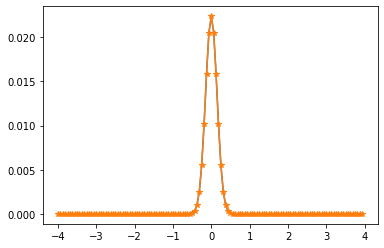

In [165]:
Ex = np.sqrt(P0/2)*e
Ey = np.sqrt(P0/2)*e

plt.plot(t, np.abs(Ex), t, np.abs(Ey),'*-')

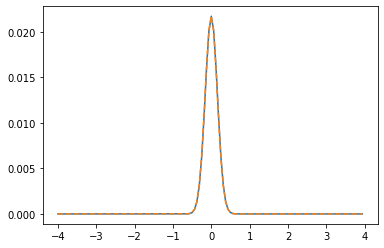

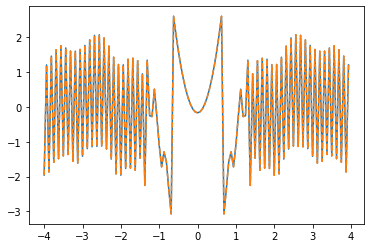

In [166]:
Ex_out, Ey_out = manakovSSF(Ex, Ey, hz, Lspan, Ltotal, alpha, gamma, D, Fc, Fs)

plt.plot(t, np.abs(Ex_out), t, np.abs(Ey_out),'--')
plt.figure()
plt.plot(t, np.angle(Ex_out), t, np.angle(Ey_out),'--')